# Google Data Analytics Capstone Project

## Cyclistic Bike-Share Analysis

### Introduction
The bike share analysis case study presented here and brings the real world scenario of the nature of bike riders, i.e.Annual member riders and non-member Casual riders in Chicago. Data for this analysis has been provided by Motivate International Inc. for 692 stations across Chicago and is a part of Course work of Google Data Analytics Certificate This case study is given by Google through E-learning cousera.

### Task
The marketing team of Cyclistic would like to maximize the number of memberships. With the help of the analysis, we will be able to see trends and be able to present solutions in order to increase memberships for the marketing team.

### What is the problem that needs to be solved?
To find out how to maximize the number of memberships and suggest recommendations on how to convince casual riders into becoming members.

### How can insights drive business decisions?
With the help of data on bike riders, we will be able to see the usage of bicycle differences between members and casual riders. This will be done with the help of visualizations and key findings from the data. With the assistance of key findings and data visualizations, recommendations will be made in order to increase memberships.



In [2]:
import pandas as pd
import numpy as np

In [18]:
df = pd.read_csv('C:\\Users\\Anna\\Downloads\\arch\\final_tripdata.csv')

### have a look at dataset

In [9]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day_week_start,duration,distance
0,000001004784CD35,docked_bike,2020-07-22 15:38:23,2020-07-22 15:56:47,Wolcott (Ravenswood) Ave & Montrose Ave,238,Southport Ave & Clybourn Ave,307,41.961406,-87.676169,41.920771,-87.663712,casual,4.0,1824.0,42501.53
1,000002EBE159AE82,electric_bike,2021-06-22 17:25:15,2021-06-22 17:31:34,Clinton St & Jackson Blvd,638,Milwaukee Ave & Grand Ave,13033,41.878261,-87.641155,41.891495,-87.648179,member,3.0,619.0,14982.48
2,00000550C665101A,docked_bike,2020-06-06 15:20:01,2020-06-06 16:28:09,Sheffield Ave & Waveland Ave,114,Kedzie Ave & Milwaukee Ave,260,41.949399,-87.654529,41.929567,-87.707857,casual,7.0,10808.0,56896.25
3,0000127970C84F62,docked_bike,2020-05-30 06:36:36,2020-05-30 06:55:28,Green St & Madison St,198,Wells St & Concord Ln,289,41.881900,-87.648800,41.912100,-87.634700,member,7.0,1892.0,33329.42
4,00001A81D056B01B,classic_bike,2021-04-14 08:10:11,2021-04-14 08:19:14,Wood St & Hubbard St,13432,Morgan St & Lake St,TA1306000015,41.889899,-87.671473,41.885483,-87.652305,member,4.0,903.0,19670.18


In [15]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
day_week_start        float64
duration              float64
distance              float64
dtype: object

In [17]:
df.shape

(5515094, 16)

### clean the data

In [21]:
#drop if duration negative
df.drop(df.index[df['duration'] <= 0], inplace = True)

In [23]:
#drop if distance negative
df.drop(df.index[df['distance'] <= 0], inplace = True)

In [25]:
df = df.dropna()

In [28]:
#check duplicates
df[df.duplicated()]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day_week_start,duration,distance


In [31]:
df['day_week_start'].replace({1.0:'sunday',2.0:'monday',3.0:'tuesday',4.0:'wednesday',5.0:'thursday',6.0:'friday',7.0:'saturday'},inplace = True)

In [33]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day_week_start,duration,distance
0,000001004784CD35,docked_bike,2020-07-22 15:38:23,2020-07-22 15:56:47,Wolcott (Ravenswood) Ave & Montrose Ave,238,Southport Ave & Clybourn Ave,307,41.961406,-87.676169,41.920771,-87.663712,casual,wednesday,1824.0,42501.53
1,000002EBE159AE82,electric_bike,2021-06-22 17:25:15,2021-06-22 17:31:34,Clinton St & Jackson Blvd,638,Milwaukee Ave & Grand Ave,13033,41.878261,-87.641155,41.891495,-87.648179,member,tuesday,619.0,14982.48
2,00000550C665101A,docked_bike,2020-06-06 15:20:01,2020-06-06 16:28:09,Sheffield Ave & Waveland Ave,114,Kedzie Ave & Milwaukee Ave,260,41.949399,-87.654529,41.929567,-87.707857,casual,saturday,10808.0,56896.25
3,0000127970C84F62,docked_bike,2020-05-30 06:36:36,2020-05-30 06:55:28,Green St & Madison St,198,Wells St & Concord Ln,289,41.881900,-87.648800,41.912100,-87.634700,member,saturday,1892.0,33329.42
4,00001A81D056B01B,classic_bike,2021-04-14 08:10:11,2021-04-14 08:19:14,Wood St & Hubbard St,13432,Morgan St & Lake St,TA1306000015,41.889899,-87.671473,41.885483,-87.652305,member,wednesday,903.0,19670.18


### have another look

In [60]:
df_member = df
df_casual = df
df_both = df

In [66]:
df.describe()

,duration,distance
count,4.685565e+06,4.685565e+06
mean,5.644010e+04,2.369751e+04
std,1.538609e+07,1.876522e+04
min,1.000000e+00,1.000000e-02
25%,8.020000e+02,1.074132e+04
50%,1.586000e+03,1.844213e+04
75%,5.121000e+03,3.146654e+04
max,8.875942e+09,4.494231e+05


In [68]:
df['member_casual'].value_counts()

member    2917439
casual    1768126
Name: member_casual, dtype: int64

In [70]:
#we have 62.26% members and 37.74% casual riders

In [72]:
df['distance'].mean()

23697.507581012313

In [74]:
df['distance'].max()

449423.09

In [76]:
df['day_week_start'].mode()

0    saturday
Name: day_week_start, dtype: object

### look at station, day and bike preferance

In [78]:
df['start_station_name'].value_counts()

Streeter Dr & Grand Ave            53336
Clark St & Elm St                  43893
Lake Shore Dr & North Blvd         38252
Lake Shore Dr & Monroe St          38184
Wells St & Concord Ln              37816
                                   ...  
Stewart Ave & 63rd St (*)              3
HQ QR                                  1
N Clark St & W Elm St                  1
N Hampden Ct & W Diversey Ave          1
Lyft Driver Center Private Rack        1
Name: start_station_name, Length: 715, dtype: int64

In [82]:
#Streeter Dr & Grand Ave  is the most popular station to start trip

In [83]:
df['end_station_name'].value_counts()

Streeter Dr & Grand Ave          56545
Clark St & Elm St                43956
Lake Shore Dr & North Blvd       40798
Theater on the Lake              39712
Wells St & Concord Ln            38637
                                 ...  
N Clark St & W Elm St                2
N Damen Ave & W Wabansia St          2
Avenue L & 114th St                  1
HQ QR                                1
N Hampden Ct & W Diversey Ave        1
Name: end_station_name, Length: 716, dtype: int64

In [85]:
#Streeter Dr & Grand Ave  is the most popular station to finish trip

In [88]:
df['rideable_type'].value_counts()

docked_bike      2776356
classic_bike     1205865
electric_bike     703344
Name: rideable_type, dtype: int64

In [89]:
#docked_bike is the most popular bike type

In [91]:
df['day_week_start'].value_counts()

saturday     833136
sunday       706254
friday       686002
wednesday    641247
thursday     621602
tuesday      615493
monday       581831
Name: day_week_start, dtype: int64

In [93]:
#saturday is the most popular day of the week

### separate riders for casual and members

In [95]:
df_member = df[df['member_casual'] == 'member']

In [98]:
df_casual = df[df['member_casual'] == 'casual']

In [100]:
df_member['distance'].mean()

22985.715532450624

In [102]:
df_member.describe()

,duration,distance
count,2.917439e+06,2.917439e+06
mean,2.552066e+04,2.298572e+04
std,1.163140e+07,1.781781e+04
min,1.000000e+00,1.000000e-02
25%,6.750000e+02,1.037690e+04
50%,1.224000e+03,1.777553e+04
75%,3.271000e+03,3.051190e+04
max,8.869776e+09,4.494231e+05


In [104]:
df_casual.describe()

,duration,distance
count,1.768126e+06,1.768126e+06
mean,1.074577e+05,2.487198e+04
std,2.010248e+07,2.017689e+04
min,1.000000e+00,1.000000e-02
25%,1.196000e+03,1.149538e+04
50%,2.543000e+03,1.971238e+04
75%,6.790000e+03,3.296709e+04
max,8.875942e+09,3.042953e+05


In [108]:
df_member['rideable_type'].value_counts()

docked_bike      1727733
classic_bike      792599
electric_bike     397107
Name: rideable_type, dtype: int64

In [110]:
df_casual['rideable_type'].value_counts()

docked_bike      1048623
classic_bike      413266
electric_bike     306237
Name: rideable_type, dtype: int64

In [114]:
df_member['start_station_name'].value_counts()
#station mostly used to start trip by Annual members

Clark St & Elm St                  28492
Kingsbury St & Kinzie St           24650
Wells St & Concord Ln              23030
Dearborn St & Erie St              22423
St. Clair St & Erie St             22228
                                   ...  
Avenue O & 118th St                    1
Vernon Ave & 107th St                  1
Elizabeth St & 92nd St                 1
Ashland Ave & 73rd St                  1
Lyft Driver Center Private Rack        1
Name: start_station_name, Length: 706, dtype: int64

In [116]:
df_casual['start_station_name'].value_counts()
#station mostly used to start trip by Casual riders

Streeter Dr & Grand Ave       39555
Millennium Park               26701
Lake Shore Dr & Monroe St     25950
Michigan Ave & Oak St         20887
Lake Shore Dr & North Blvd    19380
                              ...  
Hampden Ct & Diversey Ave         3
W 103rd St & S Avers Ave          3
HQ QR                             1
N Clark St & W Elm St             1
Stewart Ave & 63rd St (*)         1
Name: start_station_name, Length: 712, dtype: int64

In [118]:
df_member['end_station_name'].value_counts()
#station ended by most Annual riders

Clark St & Elm St           29235
Kingsbury St & Kinzie St    24892
St. Clair St & Erie St      23893
Wells St & Concord Ln       23554
Dearborn St & Erie St       23346
                            ...  
Ashland Ave & 73rd St           1
Yates Blvd & 93rd St            1
N Clark St & W Elm St           1
Avenue O & 134th St             1
Loomis St & 89th St             1
Name: end_station_name, Length: 709, dtype: int64

In [120]:
df_casual['end_station_name'].value_counts()
#station ended by most Casual riders

Streeter Dr & Grand Ave                             43370
Millennium Park                                     28405
Lake Shore Dr & Monroe St                           24336
Lake Shore Dr & North Blvd                          22059
Michigan Ave & Oak St                               22038
                                                    ...  
Woodlawn & 103rd - Olive Harvey Vaccination Site        3
Eggleston Ave & 69th St (*)                             2
Avenue L & 114th St                                     1
N Clark St & W Elm St                                   1
N Hampden Ct & W Diversey Ave                           1
Name: end_station_name, Length: 714, dtype: int64

In [122]:
df_member['day_week_start'].value_counts()
#Annual members preferable week days

wednesday    447619
tuesday      431542
friday       430723
thursday     426599
saturday     419125
monday       396422
sunday       365409
Name: day_week_start, dtype: int64

In [124]:
df_casual['day_week_start'].value_counts()
#Annual members preferable week days

saturday     414011
sunday       340845
friday       255279
thursday     195003
wednesday    193628
monday       185409
tuesday      183951
Name: day_week_start, dtype: int64

In [182]:
casual_rides_per_day = df[df['member_casual'] == 'casual'].groupby('day_week_start')['ride_id'].count()
casual_rides_per_day

day_week_start
friday       255279
monday       185409
saturday     414011
sunday       340845
thursday     195003
tuesday      183951
wednesday    193628
Name: ride_id, dtype: int64

In [179]:
member_rides_per_day = df[df['member_casual'] == 'member'].groupby('day_week_start')['ride_id'].count()
member_rides_per_day

day_week_start
friday       430723
monday       396422
saturday     419125
sunday       365409
thursday     426599
tuesday      431542
wednesday    447619
Name: ride_id, dtype: int64

### have a look at length of ride

In [156]:
df["started_at"] = pd.to_datetime(df["started_at"])
df["ended_at"] = pd.to_datetime(df["ended_at"])

In [158]:
# calculating the ride length 
df["ride_length"] = df["ended_at"] - df["started_at"]

In [160]:
#mean length for casual
df_casual = df[df['member_casual'] == 'casual']
df_casual_mean = df_casual['ride_length'].mean()
df_casual_mean

Timedelta('0 days 00:41:08.603157806')

In [162]:
#mean length for annual
df_member = df[df['member_casual'] == 'member']
df_member_mean = df_member['ride_length'].mean()
df_member_mean

Timedelta('0 days 00:14:55.208252511')

### Summary of trends observed
* Least used bikes are electric bikes
* There are more members than non-members (casual riders)
* Saturday has the most amount of riders
* Most casual riders ride on Saturday while most members ride on Wednesday
* Preferable stations to start trips don't differ for casual and members
* Duration of time length between casual riders (14 min., 55 sec.) and members (41 min., 08 sec.) are very different

### share the results

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns

### a breakdown of the type of bikes used.

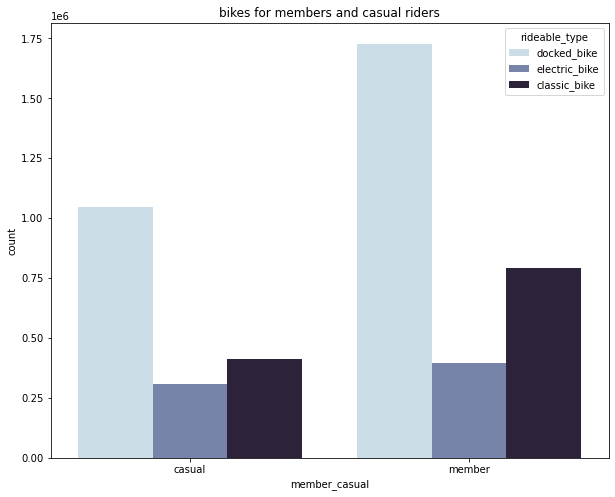

In [169]:
#which type of bike every member type uses
plt.figure(figsize=(10,8))
plt.title('bikes for members and casual riders')
sns.countplot(x='member_casual', hue='rideable_type', palette='ch:s=.25,rot=-.25', data=df)
plt.ticklabel_format(axis='y')

### A visual comparison between members and casual riders.

In [172]:
member_type = df['member_casual'].value_counts()
member_type

member    2917439
casual    1768126
Name: member_casual, dtype: int64

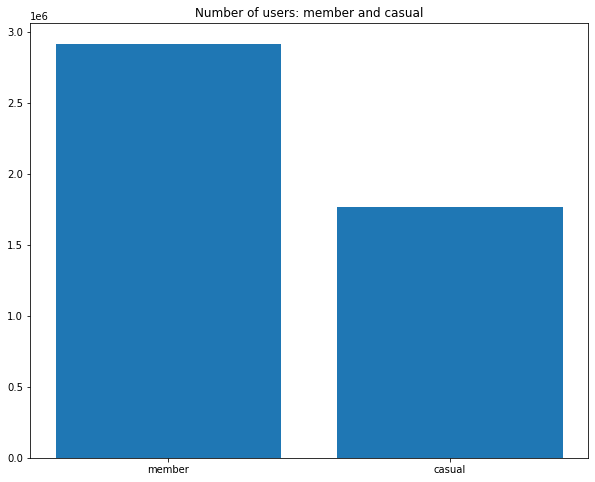

In [174]:
plt.figure(figsize=(10,8))
plt.title("Number of users: member and casual")
plt.bar(member_type.index, member_type.values)
plt.ticklabel_format(axis='y')

### A line plot comparing members and casual riders for each day of the week.

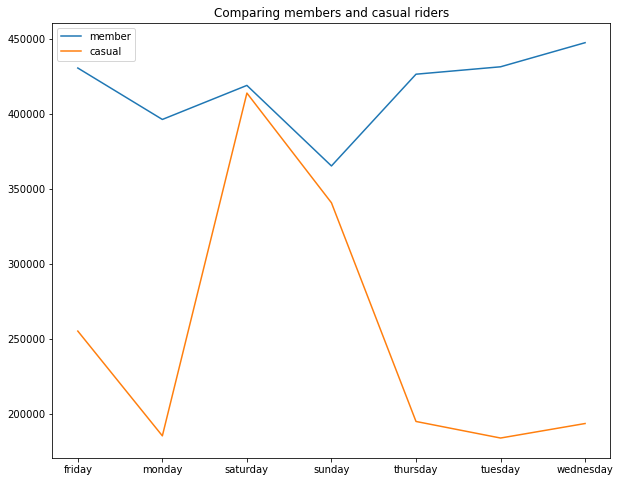

In [184]:
plt.figure(figsize=(10,8))
plt.plot(member_rides_per_day)
plt.plot(casual_rides_per_day)
plt.title("Comparing members and casual riders")
plt.legend(['member','casual'])
labels=[('day_of_week')]
plt.xticks(member_rides_per_day.index)
plt.show()

### A visual plot for all riders for each month.

<AxesSubplot:xlabel='member_casual', ylabel='count'>

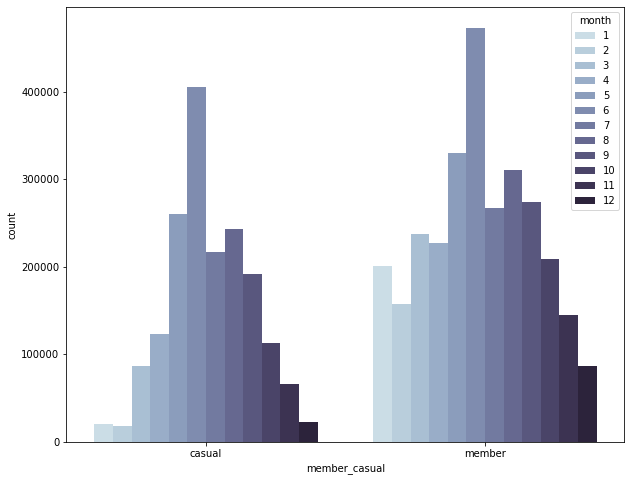

In [187]:
plt.figure(figsize=(10,8))

sns.countplot(x='member_casual', hue='month', palette='ch:s=.25,rot=-.25', data=df)

### Act
Based on the analysis, there are more casual riders than membership holders. As a company we can entice casual users on Fridays to sign up for discounted memberships at least for the first year. According to the data, our membership capture rate potential is best done on Fridays and can be flexible through the weekend.

With the expected increase of ridership on weekends, there would need to be a bigger supply of bikes during the weekends.

With responsible use of funds, more electric bikes can be introduced for the public.

One way to incentivize current members is a referral program where there can be a points system that can be redeemed in the future for discounted rates on membership.

For casual users who use our service for more miles, we can incentivize by discounting rates of membership. We recommend to incentivize new members for rewards on bike use during weekdays.

Marketing department can assist in promotions for converting casual riders into members for bicycle use during weekdays.

Memberships can be completed quickly and downloaded on the phone for casual riders. This way, new members will be able to use the bike immediately.